In [139]:
# Load dataset
import numpy as np
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [141]:
df.shape

(918, 12)

In [142]:
# Display unique attributes in each column
for col in df.columns:
  print(col + ":-")
  print(df[col].unique())
  print("-------------------------------------------------------")

Age:-
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
-------------------------------------------------------
Sex:-
['M' 'F']
-------------------------------------------------------
ChestPainType:-
['ATA' 'NAP' 'ASY' 'TA']
-------------------------------------------------------
RestingBP:-
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
-------------------------------------------------------
Cholesterol:-
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 

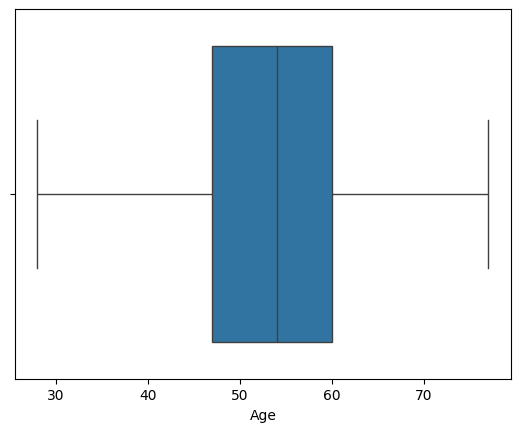

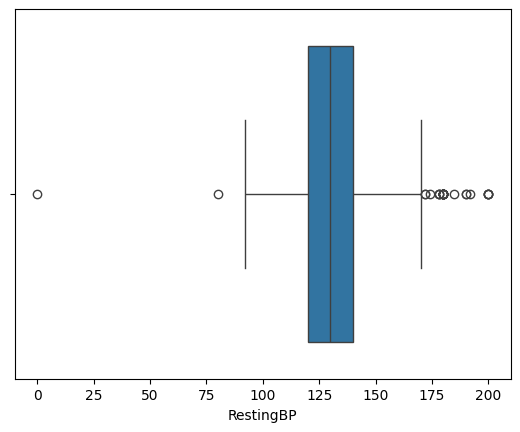

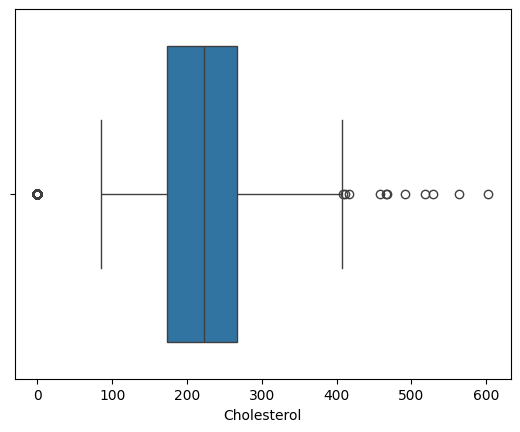

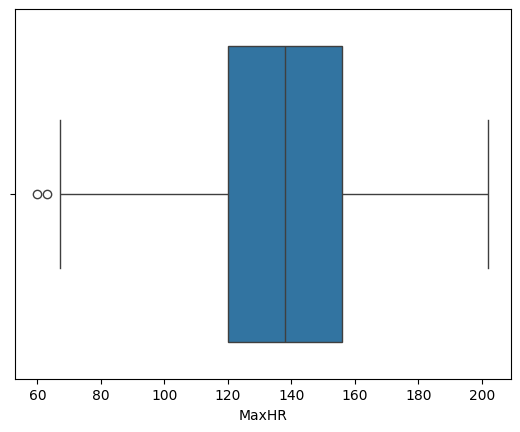

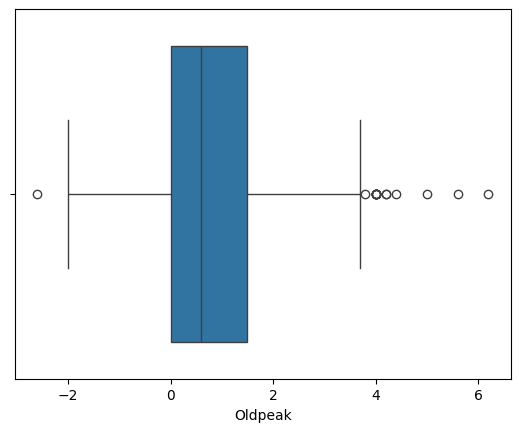

In [143]:
# Plot boxplot for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for col in num_cols:
  sns.boxplot(x=df[col])
  plt.show()

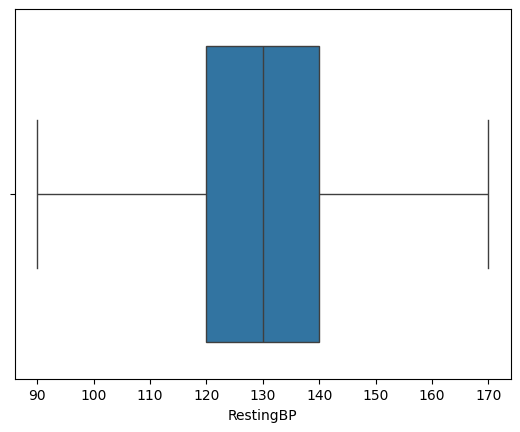

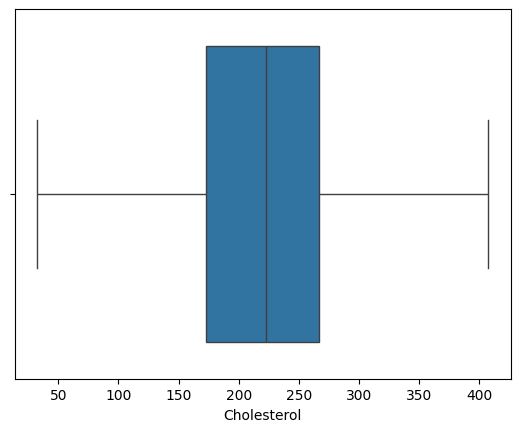

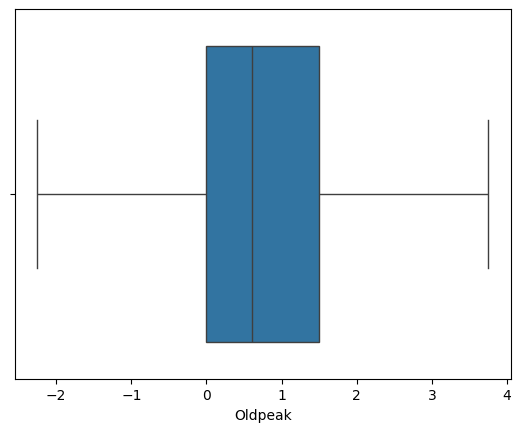

In [145]:
# handle outliers using IQR
cols_with_outliers = ['RestingBP', 'Cholesterol', 'Oldpeak']

for col in cols_with_outliers:
  q1, q3 = df[col].quantile([0.25, 0.75])
  iqr = q3-q1
  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr
  df[col] = df[col].clip(lower, upper)


# Plot boxplot
for col in cols_with_outliers:
  sns.boxplot(x=df[col])
  plt.show()

In [146]:
# Apply scaling
scaling_cols = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[scaling_cols] = sc.fit_transform(df[scaling_cols])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.463654,0.886771,0,Normal,1.382928,N,-0.851276,Up,0
1,-0.478484,F,NAP,1.641229,-0.250184,0,Normal,0.754157,N,0.118532,Flat,1
2,-1.751359,M,ATA,-0.125133,0.824187,0,ST,-1.525138,N,-0.851276,Up,0
3,-0.584556,F,ASY,0.345897,0.104463,0,Normal,-1.132156,Y,0.603436,Flat,1
4,0.051881,M,NAP,1.052442,-0.093722,0,Normal,-0.581981,N,-0.851276,Up,0


In [147]:
# Perform ordinal encoding on choosen columns
from sklearn.preprocessing import OrdinalEncoder
oe_cols = ['Sex', 'ExerciseAngina']
oe = OrdinalEncoder()
df[oe_cols] = oe.fit_transform(df[oe_cols])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1.0,ATA,0.463654,0.886771,0,Normal,1.382928,0.0,-0.851276,Up,0
1,-0.478484,0.0,NAP,1.641229,-0.250184,0,Normal,0.754157,0.0,0.118532,Flat,1
2,-1.751359,1.0,ATA,-0.125133,0.824187,0,ST,-1.525138,0.0,-0.851276,Up,0
3,-0.584556,0.0,ASY,0.345897,0.104463,0,Normal,-1.132156,1.0,0.603436,Flat,1
4,0.051881,1.0,NAP,1.052442,-0.093722,0,Normal,-0.581981,0.0,-0.851276,Up,0


In [148]:
# Perform One hot encoding on choosen columns
from sklearn.preprocessing import OneHotEncoder

ohe_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
ohe = OneHotEncoder(drop='first', sparse_output=False)

ohe_array = ohe.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(), index=df.index)
df = pd.concat([df, ohe_df], axis=1)
df = df.drop(ohe_cols, axis=1)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1.0,0.463654,0.886771,0,1.382928,0.0,-0.851276,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.478484,0.0,1.641229,-0.250184,0,0.754157,0.0,0.118532,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-1.751359,1.0,-0.125133,0.824187,0,-1.525138,0.0,-0.851276,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.584556,0.0,0.345897,0.104463,0,-1.132156,1.0,0.603436,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.051881,1.0,1.052442,-0.093722,0,-0.581981,0.0,-0.851276,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1.0,-1.302708,0.626002,0,-0.188999,0.0,0.312494,1,0.0,0.0,1.0,1.0,0.0,1.0,0.0
914,1.536902,1.0,0.699169,-0.114584,1,0.164684,0.0,2.446073,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
915,0.370100,1.0,-0.125133,-0.761292,0,-0.857069,1.0,0.312494,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
916,0.370100,0.0,-0.125133,0.333940,0,1.461525,0.0,-0.851276,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
# Defining GridSearchCV params for SVM, logistic, random forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

params_grid = {
    'LogisticRegression':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[10, 50, 100],
            'criterion':['gini', 'entropy']
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[1, 5, 10],
            'kernel':['rbf', 'linear']
        }
    }
}

In [150]:
# Splitting data into X and Y
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

In [151]:
# Applying GridSearchCV to find best params
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, model_params in params_grid.items():
  clf = GridSearchCV(model_params['model'], model_params['params'], cv=5, return_train_score=False)
  clf.fit(X, Y)
  scores.append({
      'model':model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })

pd.DataFrame(scores, columns=['model','best_score','best_params'])

,model,best_score,best_params
0,LogisticRegression,0.830025,{'C': 1}
1,RandomForestClassifier,0.832175,"{'criterion': 'entropy', 'n_estimators': 50}"
2,SVM,0.829966,"{'C': 1, 'kernel': 'rbf'}"


In [152]:
# Train test splot
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [153]:
# Applying LR with C=1
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1)
lr.fit(X_train, Y_train)
lr.score(X_test, Y_test)

0.8532608695652174

In [154]:
# PCA to reduce dimensions while maintaining 95% variance
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)

In [155]:
# Shape before and after
print("Shape before PCA :- ", X.shape)
print("Shape after PCA :- ", X_pca.shape)

Shape before PCA :-  (918, 15)
Shape after PCA :-  (918, 11)


In [157]:
# Now checking accuracy of our model
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size=0.2)
lr.fit(X_train_pca, Y_train_pca)
lr.score(X_test_pca, Y_test_pca)

0.8586956521739131

<Axes: >

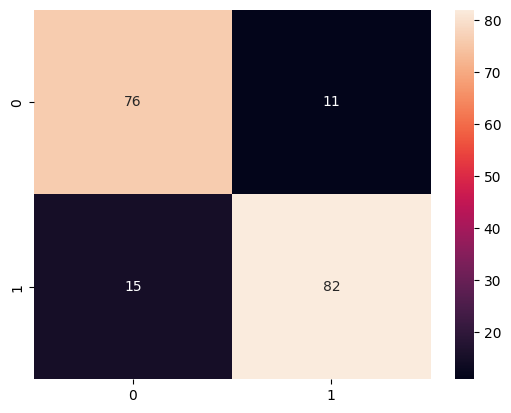

In [158]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
Y_pred = lr.predict(X_test_pca)
cm = confusion_matrix(Y_test_pca, Y_pred)
sns.heatmap(cm, annot=True)